In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [4]:
df_final_train = read_hdf('/content/drive/My Drive/Classroom/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/My Drive/Classroom/storage_sample_stage4.h5', 'test_df',mode='r')

In [5]:
train_graph = nx.read_edgelist('/content/drive/My Drive/Classroom/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [6]:
def compute_features_stage1(df_final):    
    num_followers_d=[]
    
    for i,row in df_final.iterrows():
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
            
        num_followers_d.append(len(d1))
  
        return num_followers_d

In [7]:
df_final_train['num_followers_d'] = compute_features_stage1(df_final_train)
df_final_test['num_followers_d']= compute_features_stage1(df_final_test)

In [8]:
df_final_train.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,6
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,94


In [9]:
p1 = []
s1 = list (df_final_train['num_followers_s'])
d1 =  list (df_final_train['num_followers_d'])

for num1,num2 in zip(s1,d1):
    p1.append(num1 * num2)

df_final_train['Preferential_followers'] = p1


p2 = []
s2 = list(df_final_test['num_followers_s'])
d2 =  list(df_final_test['num_followers_d'])

for num1,num2 in zip(s2,d2):
    p2.append(num1 * num2)

df_final_test['Preferential_followers'] = p2


In [10]:
df_final_train.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,Preferential_followers
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,6,36
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,94,8836


In [11]:
p1 = []
s1 = list (df_final_train['num_followees_s'])
d1 =  list (df_final_train['num_followees_d'])

for num1,num2 in zip(s1,d1):
    p1.append(num1 * num2)

df_final_train['Preferential_followees'] = p1


p2 = []
s2 = list (df_final_test['num_followees_s'])
d2 =  list (df_final_test['num_followees_d'])

for num1,num2 in zip(s2,d2):
    p2.append(num1 * num2)

df_final_test['Preferential_followees'] = p2


In [12]:
su1 = list(df_final_train['svd_u_s_1'])
su2 = list(df_final_train['svd_u_s_2'])
su3 = list(df_final_train['svd_u_s_3'])
su4 = list(df_final_train['svd_u_s_4'])
su5 = list(df_final_train['svd_u_s_5'])
su6 = list(df_final_train['svd_u_s_6'])

sv1 = list(df_final_train['svd_v_s_1'])
sv2 = list(df_final_train['svd_v_s_2'])
sv3 = list(df_final_train['svd_v_s_3'])
sv4 = list(df_final_train['svd_v_s_4'])
sv5 = list(df_final_train['svd_v_s_5'])
sv6 = list(df_final_train['svd_v_s_6'])



du1 = list(df_final_train['svd_u_d_1'])
du2 = list(df_final_train['svd_u_d_2'])
du3 = list(df_final_train['svd_u_d_3'])
du4 = list(df_final_train['svd_u_d_4'])
du5 = list(df_final_train['svd_u_d_5'])
du6 = list(df_final_train['svd_u_d_6'])

dv1 = list(df_final_train['svd_v_d_1'])
dv2 = list(df_final_train['svd_v_d_2'])
dv3 = list(df_final_train['svd_v_d_3'])
dv4 = list(df_final_train['svd_v_d_4'])
dv5 = list(df_final_train['svd_v_d_5'])
dv6 = list(df_final_train['svd_v_d_6'])


In [13]:
from tqdm.autonotebook import tqdm
svd_prod = []
for i in tqdm(range(0,100002)):
    a = []
    b = []
    a.append(su1[i])
    a.append(su2[i])
    a.append(su3[i])
    a.append(su4[i])
    a.append(su5[i])
    a.append(su6[i])

    b.append(du1[i])
    b.append(du2[i])
    b.append(du3[i])
    b.append(du4[i])
    b.append(du5[i])
    b.append(du6[i])

    val1 = np.dot(a,b)

    a = []
    b = []

    a.append(sv1[i])
    a.append(sv2[i])
    a.append(sv3[i])
    a.append(sv4[i])
    a.append(sv5[i])
    a.append(sv6[i])



    b.append(dv1[i])
    b.append(dv2[i])
    b.append(dv3[i])
    b.append(dv4[i])
    b.append(dv5[i])
    b.append(dv6[i])

    val2 = np.dot(a,b)

    svd_prod.append(val1 + val2)

In [14]:
df_final_train['svd_product'] = svd_prod

In [15]:
su1 = list(df_final_test['svd_u_s_1'])
su2 = list(df_final_test['svd_u_s_2'])
su3 = list(df_final_test['svd_u_s_3'])
su4 = list(df_final_test['svd_u_s_4'])
su5 = list(df_final_test['svd_u_s_5'])
su6 = list(df_final_test['svd_u_s_6'])

sv1 = list(df_final_test['svd_v_s_1'])
sv2 = list(df_final_test['svd_v_s_2'])
sv3 = list(df_final_test['svd_v_s_3'])
sv4 = list(df_final_test['svd_v_s_4'])
sv5 = list(df_final_test['svd_v_s_5'])
sv6 = list(df_final_test['svd_v_s_6'])



du1 = list(df_final_test['svd_u_d_1'])
du2 = list(df_final_test['svd_u_d_2'])
du3 = list(df_final_test['svd_u_d_3'])
du4 = list(df_final_test['svd_u_d_4'])
du5 = list(df_final_test['svd_u_d_5'])
du6 = list(df_final_test['svd_u_d_6'])

dv1 = list(df_final_test['svd_v_d_1'])
dv2 = list(df_final_test['svd_v_d_2'])
dv3 = list(df_final_test['svd_v_d_3'])
dv4 = list(df_final_test['svd_v_d_4'])
dv5 = list(df_final_test['svd_v_d_5'])
dv6 = list(df_final_test['svd_v_d_6'])


In [16]:
df_final_test.shape

(50002, 57)

In [17]:
from tqdm.autonotebook import tqdm
svd_prod = []
for i in tqdm(range(50002)):
    a = []
    b = []
    a.append(su1[i])
    a.append(su2[i])
    a.append(su3[i])
    a.append(su4[i])
    a.append(su5[i])
    a.append(su6[i])

    b.append(du1[i])
    b.append(du2[i])
    b.append(du3[i])
    b.append(du4[i])
    b.append(du5[i])
    b.append(du6[i])

    val1 = np.dot(a,b)

    a = []
    b = []

    a.append(sv1[i])
    a.append(sv2[i])
    a.append(sv3[i])
    a.append(sv4[i])
    a.append(sv5[i])
    a.append(sv6[i])



    b.append(dv1[i])
    b.append(dv2[i])
    b.append(dv3[i])
    b.append(dv4[i])
    b.append(dv5[i])
    b.append(dv6[i])

    val2 = np.dot(a,b)

    svd_prod.append(val1 + val2)

In [18]:
df_final_test['svd_product'] = svd_prod

In [19]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,Preferential_followers,Preferential_followees,svd_product
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,6,36,120,1.338835e-11
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,94,8836,8662,4.099684e-03
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-4.900734e-18,1.096831e-18,-6.816555e-19,-2.226453e-18,6.710556e-19,-8.161336e-19,-2.606312e-18,6.392474e-19,-4.245830e-19,-1.315747e-18,3.849627e-19,-1.131971e-18,-1.510265e-18,1.454979e-19,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,28,784,902,2.034290e-35
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,-9.965436e-12,4.077137e-13,5.083778e-10,1.985267e-14,2.471968e-12,1.004354e-15,-2.629029e-13,1.428940e-11,9.146784e-11,8.590132e-12,2.406658e-10,7.638106e-15,-2.170899e-13,5.206150e-13,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,11,121,35,3.206490e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,-3.408943e-13,1.125207e-13,3.190883e-07,8.550846e-14,1.405351e-13,7.172313e-15,-2.550169e-13,2.424636e-13,2.436301e-07,3.679960e-14,1.348520e-13,8.710393e-15,-4.795514e-13,1.521297e-13,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1,33,7.773952e-14


In [20]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'Preferential_followers', 'Preferential_followees',
       'svd_product'],
      dtype='object')

In [21]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [22]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [23]:
import gc
gc.collect()

18

In [25]:
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)}


xg_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state = 25,return_train_score=True)

xg_random.fit(df_final_train,y_train)
print('mean test scores',xg_random.cv_results_['mean_test_score'])
print('mean train scores',xg_random.cv_results_['mean_train_score'])

mean test scores [0.98011984 0.98022124 0.98025191 0.98040104 0.9804537 ]
mean train scores [0.99994117 0.99996337 0.99255416 0.99540415 0.99575036]


In [26]:
print(xg_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [24]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=112,
       n_jobs=-1, nthread=None, objective='binary:logistic', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1,verbosity=1)

In [25]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [26]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9955696329410821
Test f1 score 0.9273259513809343


In [27]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):    
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


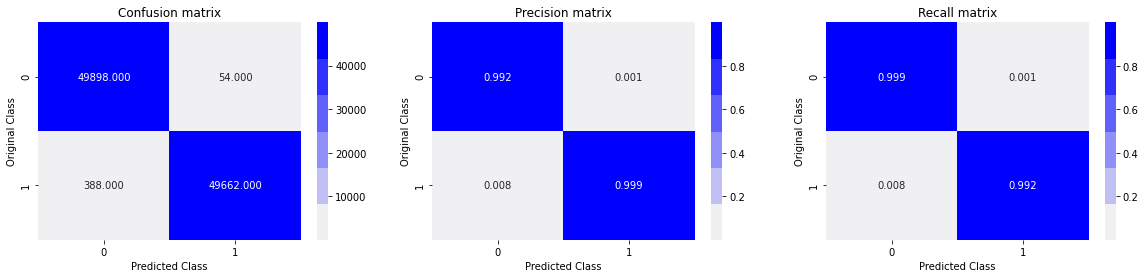

Test confusion_matrix


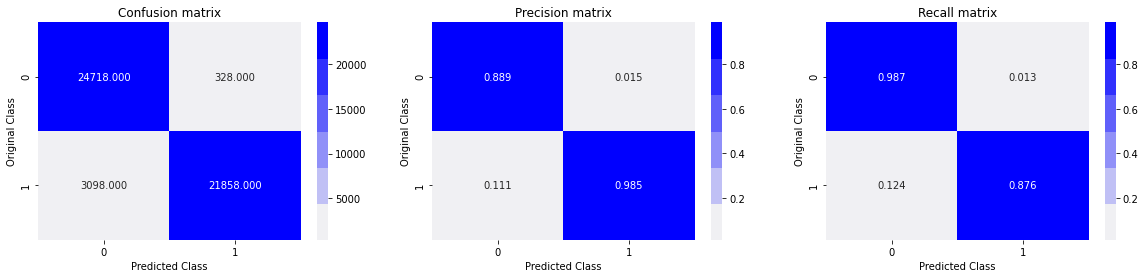

In [28]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

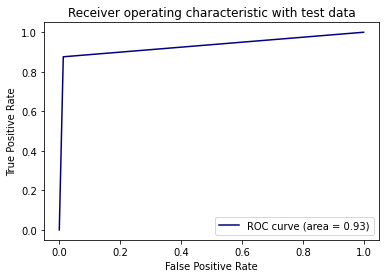

In [29]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

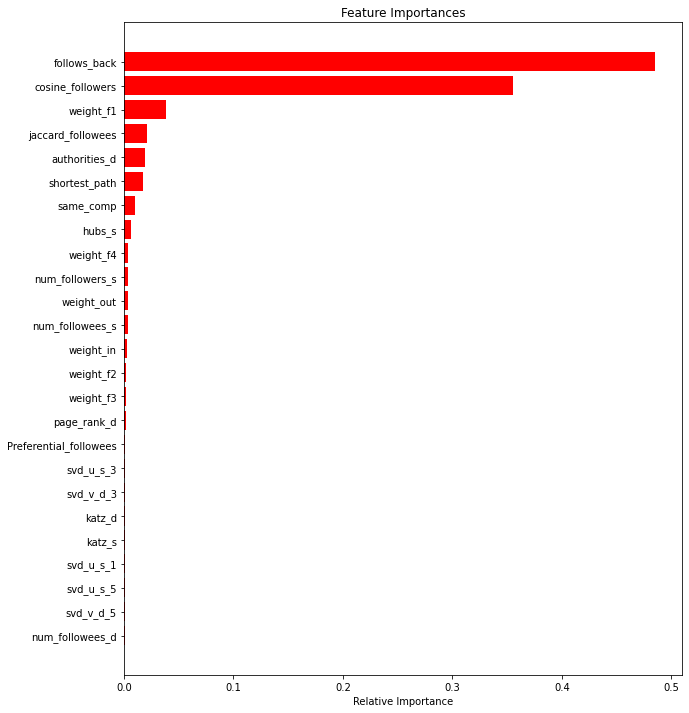

In [30]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2> Observations: </h2>
<ol>
    <li> We took a Graph based approach to solve this problem .We computed various graph related features for solving this problem e.g shortest path, checking for same community, adar index etc.>
    <li> Some simple features such as 'is follows back' were also computed. </li>
    <li> To pose this problem as a machine learning one, we created an equal number of datapoints which did not have an edge present between them and labelled them as 0</li>
    <li> In this assignment I created a set of features such as Preferntial Attachement of followers and followees of a user. The main idea behind this feature was that users with many friends tend to create more connections in the future. We've taken SVD features of both source and destination vertices and also took the dot product of them as a feature </li>
    <li> We used Xgboost as our classifier and computed the train and test f1-scores after hyperparameter tuning. </li>
    <li>We then plotted the Roc curve for the test data and displayed the confusion, precision and recall matrices for both train and test data.</li>
    <li> We displayed the 25 most important features used by the classifier in classifying the labels </li>
        
</ol>
    